<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/Batch10/Intro_to_ML_Titanic_Dataset_B10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# End to End ML Pipeline with Python

The Titanic Dataset is a well-known dataset in the field of data science, primarily used for predictive modeling and analysis. It contains detailed information about the passengers aboard the RMS Titanic, which sank on its maiden voyage in 1912. The dataset provides insights into various factors that influenced survival rates during this infamous maritime disaster.

*Key Features of the Dataset*

Passenger Information: The dataset includes attributes such as Passenger ID, Survived (indicating whether the passenger survived or not), Pclass (ticket class: 1st, 2nd, or 3rd), Name, Sex, Age, SibSp (number of siblings/spouses aboard), Parch (number of parents/children aboard), Ticket, Fare (amount paid for the ticket), Cabin, and Embarked (port of embarkation) 126.

Data Size and Structure: The Titanic dataset typically consists of around 891 records of passengers from a total of approximately 2,224 individuals on board, making it a manageable size for analysis. It is often split into training and test sets for machine learning purposes 36.

Survival Analysis: The primary goal when using this dataset is to predict survival based on various features. It allows researchers to explore patterns and correlations between passenger demographics and survival outcomes, highlighting disparities based on factors such as gender, age, and socio-economic status 456.

Educational Use: This dataset is widely utilized in data science education to teach statistical analysis, data cleaning, and machine learning techniques. It serves as an excellent case study for understanding classification algorithms and exploratory data analysis 23.

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression and Decision Tress in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [33]:
# Install/Import all necessary libraries
# !pip install numpy pandas scikit-learn seaborn matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For splitting data into train/test sets
from sklearn.model_selection import train_test_split

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# (Add any other ensemble or advanced models as desired)

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [111]:
train = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/titanic_train_demo.csv')

In [112]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Handle Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

- Missing Age values
- Missing Cabin values
- Possibly some missing Embarked values


<Axes: >

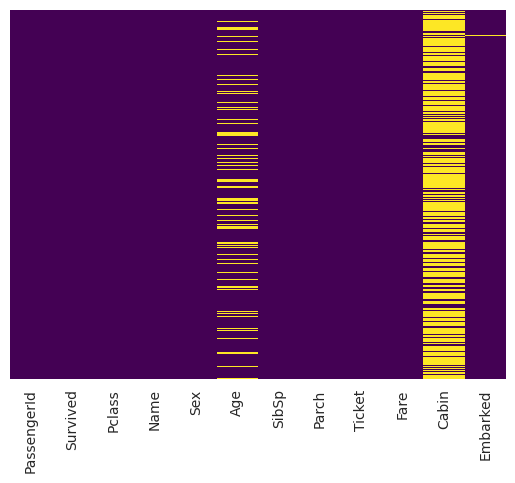

In [114]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

<ipython-input-115-05742e5567b5>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Survived', ylabel='count'>

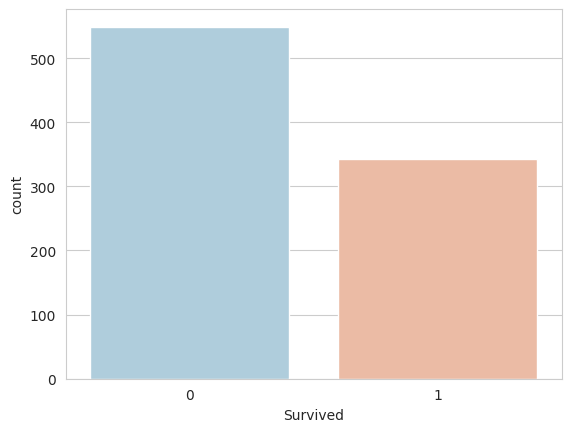

In [115]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

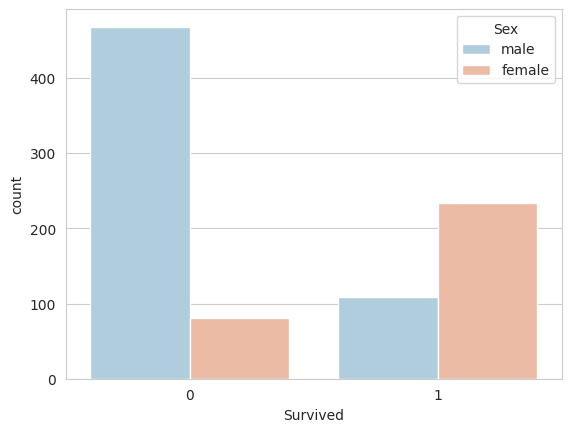

In [116]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

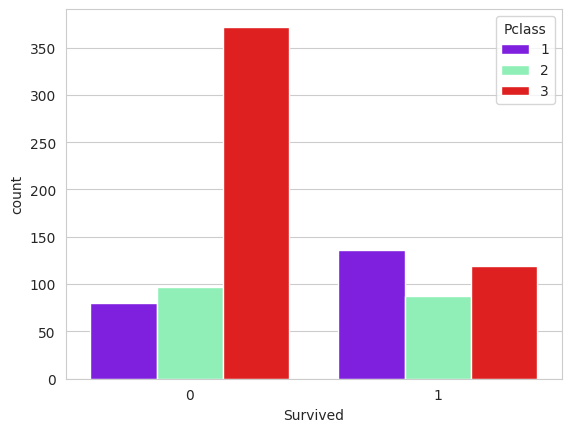

In [117]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<ipython-input-118-53c281d34688>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age'>

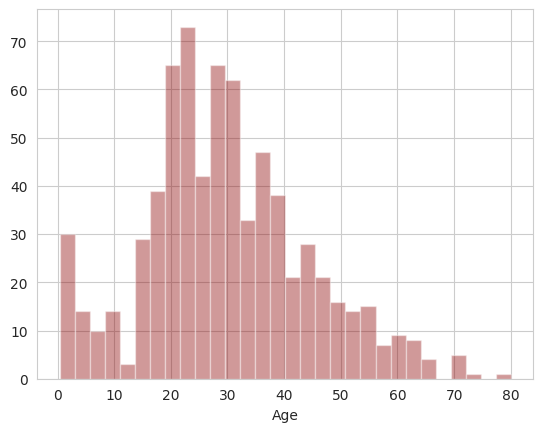

In [118]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: >

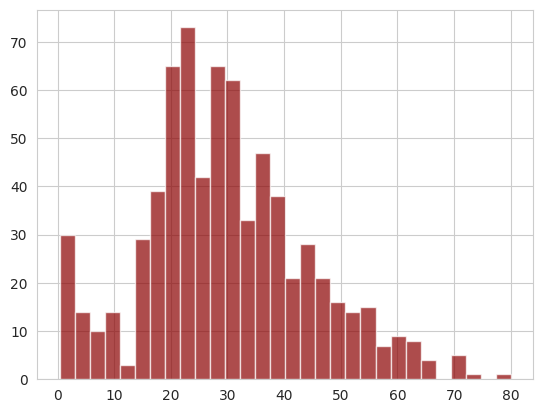

In [119]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

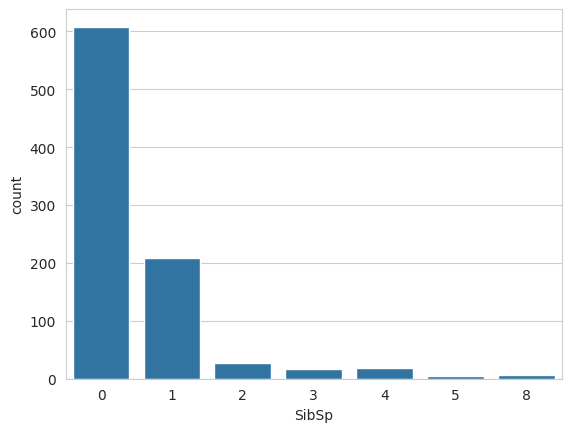

In [120]:
sns.countplot(x='SibSp',data=train)

<Axes: >

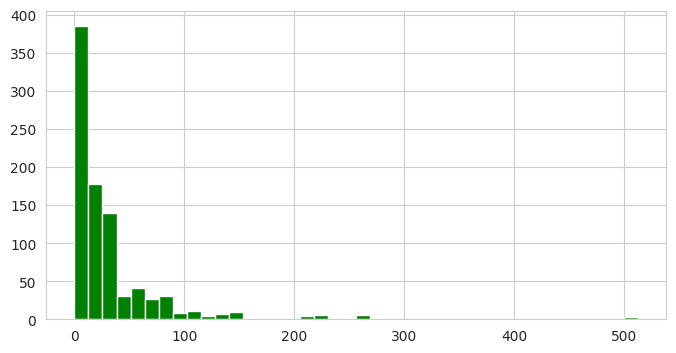

In [121]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<ipython-input-122-551bc5ec5847>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

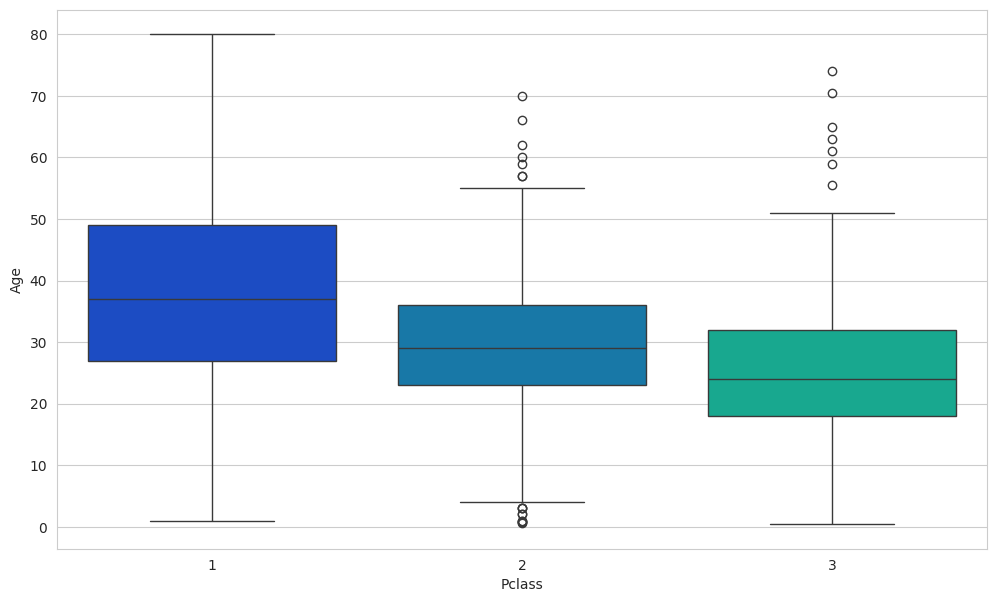

In [122]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [123]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [124]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<ipython-input-123-b8fc05cf2ef4>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-123-b8fc05cf2ef4>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Now let's check that heat map again!

<Axes: >

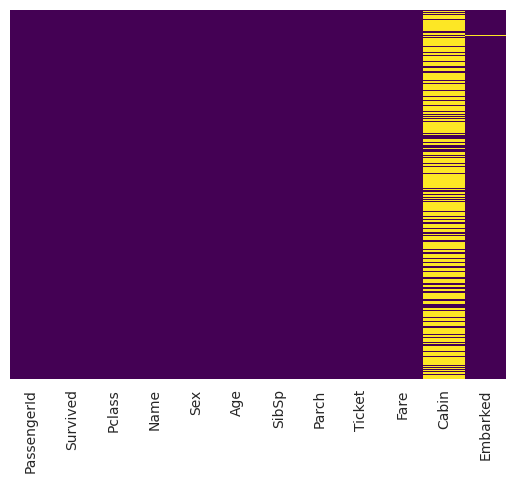

In [125]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [126]:
train.drop('Cabin',axis=1,inplace=True)

In [127]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- Impute Age based on Pclass
- Drop Cabin or turn it into a binary feature “Has Cabin” if you want to keep partial info (since it is often heavily missing).
- Drop rows with missing Embarked or fill them in with the most common port.

In [128]:
train.dropna(inplace=True)

## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


We need to transform the non-numerical data (e.g. Sex and Embarked) into numerical form for machine learning. A common approach is encoding

In [130]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
print(sex)
print(embark)

      male
0     True
1    False
2    False
3    False
4     True
..     ...
886   True
887  False
888  False
889   True
890   True

[889 rows x 1 columns]
         Q      S
0    False   True
1    False  False
2    False   True
3    False   True
4    False   True
..     ...    ...
886  False   True
887  False   True
888  False   True
889  False  False
890   True  False

[889 rows x 2 columns]


In [131]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [132]:
train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)
# train.drop(['Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)

In [133]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [134]:
train = pd.concat([train,sex,embark],axis=1)

In [135]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Great! Our data is ready for our model!

# Building Basic Clasification Models

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).



## Train Test Split

A train–test split is used to evaluate how well the model generalizes to unseen data. We hold out a portion of our data as the “test set” and train on the remainder.

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [140]:
# define our feature matrix X and our target vector y
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [141]:
# X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
#                                                     train['Survived'], test_size=0.30,
#                                                     random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.30,
                                                    random_state=101)

In [142]:
print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes:
X_train: (622, 8)
X_test: (267, 8)
y_train: (622,)
y_test: (267,)


Note on test_size:

- If you use a smaller test size (e.g. test_size=0.2), you train on more data but have less data to evaluate. This might lead to less reliable test metrics (due to smaller sample).
- If you use a larger test size (e.g. test_size=0.4 or 0.5), you have more data to evaluate but less data to train, potentially hurting the model’s ability to learn.

### Optional: Sampling

could do multiple splits (e.g., k-fold cross-validation or repeated train–test splits) or use sampling strategies like oversampling (randomly duplicating minority class) or undersampling (randomly removing majority class) to address class imbalance.
Then proceed to train your models on X_train_res, y_train_res instead of X_train, y_train. But this is optional and depends on your data distribution.



In [94]:
# OPTIONAL
# !pip install imblearn  # if needed
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# print("Resampled X_train shape:", X_train_res.shape)
# print("Resampled y_train shape:", y_train_res.shape)


## Training and Predicting

### Decision Trees


In [95]:
# Initialize a DecisionTreeClassifier
# Some commonly tuned hyperparameters: max_depth, min_samples_split, min_samples_leaf, criterion, etc.
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Predict
predictions_dtree = dtree.predict(X_test)

# Evaluate
print("Decision Tree - Accuracy:", accuracy_score(y_test, predictions_dtree))
print("Decision Tree - F1 Score:", f1_score(y_test, predictions_dtree))
print("\nDecision Tree - Classification Report:\n", classification_report(y_test, predictions_dtree))


Decision Tree - Accuracy: 0.7715355805243446
Decision Tree - F1 Score: 0.7024390243902439

Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       163
           1       0.71      0.69      0.70       104

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [99]:
# Initialize the LogisticRegression model
# Some commonly tuned hyperparameters: C, penalty, solver, etc.
logmodel = LogisticRegression(random_state=42, max_iter=200)  # note: might need a higher max_iter
# Train
logmodel.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=200, random_state=42)

In [102]:
predictions_log = logmodel.predict(X_test)

# Evaluate
print("Logistic Regression - Accuracy:", accuracy_score(y_test, predictions_log))
print("Logistic Regression - F1 Score:", f1_score(y_test, predictions_log))
print("\nLogistic Regression - Classification Report:\n", classification_report(y_test, predictions_log))

Logistic Regression - Accuracy: 0.8277153558052435
Logistic Regression - F1 Score: 0.7553191489361702

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



### Hyperparameter Tuning

#### Decision Tree

In [104]:
# Example parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],    # The function to measure the quality of a split
    'max_depth': [None, 2, 4, 6, 8, 10], # The maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6]     # The minimum number of samples required to be at a leaf node
}

grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='accuracy',      # or 'f1', 'precision', 'recall', etc.
    cv=5,                    # 5-fold cross-validation
    n_jobs=-1,               # use all processors
    verbose=1
)

grid_dt.fit(X_train, y_train)

print("Best DecisionTree params:", grid_dt.best_params_)
print("Best DecisionTree score:", grid_dt.best_score_)

# Evaluate on the test set:
best_dtree = grid_dt.best_estimator_
dtree_test_preds = best_dtree.predict(X_test)
print("\nTuned Decision Tree - Test Accuracy:", accuracy_score(y_test, dtree_test_preds))
print("Tuned Decision Tree - Test F1 Score:", f1_score(y_test, dtree_test_preds))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best DecisionTree params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best DecisionTree score: 0.8183612903225808

Tuned Decision Tree - Test Accuracy: 0.8089887640449438
Tuned Decision Tree - Test F1 Score: 0.7182320441988951


- criterion: Method used to measure the quality of a split. Options typically “gini” or “entropy.”
- max_depth: Maximum depth of the tree. If None, nodes are expanded until all leaves are pure or until all leaves contain fewer than min_samples_split samples.
- min_samples_split: Minimum number of samples required to split an internal node. Higher values regularize the tree by preventing it from growing too deep.
- min_samples_leaf: Minimum number of samples required to be at a leaf node. Also helps to regularize.

#### Logistic Regression

In [103]:
# Example parameter grid
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],       # Inverse of regularization strength; smaller values = stronger regularization
    'solver': ['newton-cg','lbfgs','liblinear'],
    'penalty': ['l2']                  # 'l1' can be used if solver supports it (e.g. 'liblinear')
}

grid_log = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=200),
    param_grid=param_grid_log,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_log.fit(X_train, y_train)

print("Best LogisticRegression params:", grid_log.best_params_)
print("Best LogisticRegression score:", grid_log.best_score_)

# Evaluate on test set
best_logmodel = grid_log.best_estimator_
log_test_preds = best_logmodel.predict(X_test)
print("\nTuned Logistic Regression - Test Accuracy:", accuracy_score(y_test, log_test_preds))
print("Tuned Logistic Regression - Test F1 Score:", f1_score(y_test, log_test_preds))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best LogisticRegression params: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best LogisticRegression score: 0.8071225806451613

Tuned Logistic Regression - Test Accuracy: 0.8202247191011236
Tuned Logistic Regression - Test F1 Score: 0.7419354838709677


- C: Inverse of the regularization strength. Smaller C = heavier regularization, helping to reduce overfitting. Larger C = weaker regularization.
- solver: Algorithm used for optimization (e.g. 'lbfgs', 'liblinear'). Different solvers can converge faster or handle certain penalties better.
- penalty: Norm used in the penalization (commonly l2, or l1 if solver supports it).

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

Tuned Logistic Regression Accuracy: 0.820
Tuned Logistic Regression F1 Score: 0.742

               precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.66      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.82       267



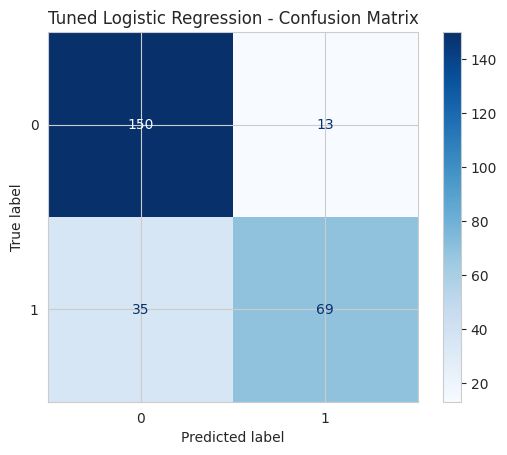

Tuned Decision Tree Accuracy: 0.809
Tuned Decision Tree F1 Score: 0.718

               precision    recall  f1-score   support

           0       0.79      0.93      0.86       163
           1       0.84      0.62      0.72       104

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



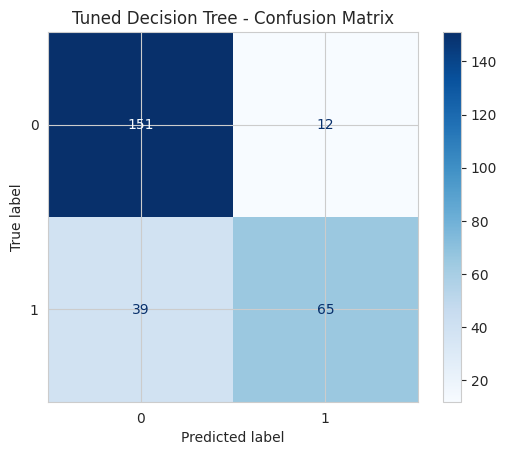

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)

    # Basic metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.3f}")
    print(f"{model_name} F1 Score: {f1:.3f}")
    print("\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

# Example usage:
evaluate_model(best_logmodel, X_test, y_test, model_name="Tuned Logistic Regression")
evaluate_model(best_dtree, X_test, y_test, model_name="Tuned Decision Tree")


- Accuracy: The proportion of correct predictions.
- Precision: Of the predicted positives, how many are truly positive?
- Recall (Sensitivity): Of all the actual positives, how many did we predict correctly?
- F1 Score: The harmonic mean of precision and recall. A balanced metric.
- Confusion Matrix: Summarizes prediction outcomes (True Positives, False Positives, True Negatives, False Negatives).

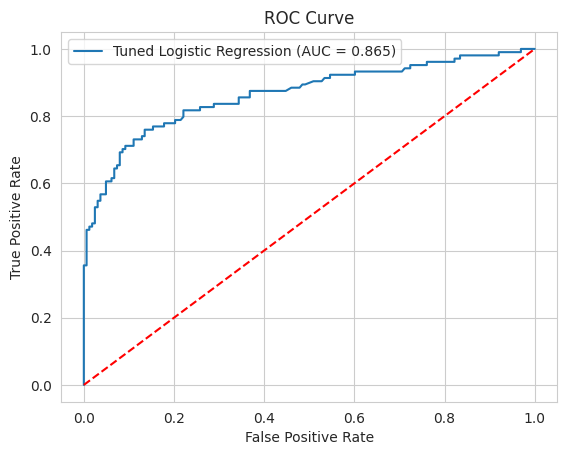

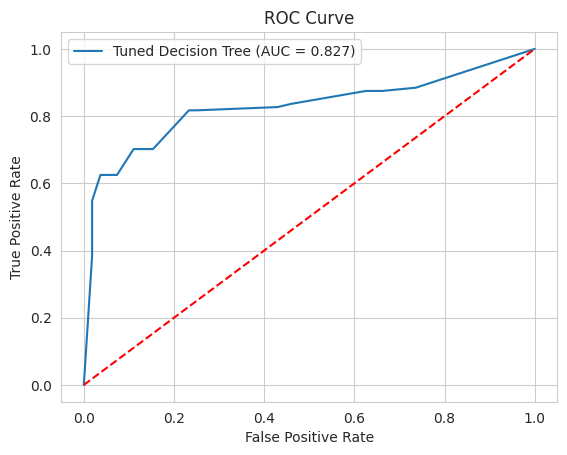

In [106]:
def plot_roc_curve(model, X_test, y_test, model_name="Model"):
    # Some models provide decision_function, others use predict_proba
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]  # probability for the positive class
    else:
        y_probs = model.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc_val = roc_auc_score(y_test, y_probs)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_val:.3f})')
    plt.plot([0,1],[0,1],'r--')  # Baseline
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Example usage
plot_roc_curve(best_logmodel, X_test, y_test, "Tuned Logistic Regression")
plot_roc_curve(best_dtree, X_test, y_test, "Tuned Decision Tree")


### Ensemble Modeling

Ensemble models combine multiple base learners to improve performance. Two popular ensembles for tabular data include Random Forest (bagging of decision trees) and Gradient Boosting (iterative boosting of weak learners).

#### Random **Forest**

In [107]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
print("Random Forest - Accuracy:", accuracy_score(y_test, rfc_preds))
print("Random Forest - F1 Score:", f1_score(y_test, rfc_preds))


Random Forest - Accuracy: 0.8127340823970037
Random Forest - F1 Score: 0.75


##### Hyperparameter Tuning for Random Forest
You might tune:

n_estimators (number of trees),
max_depth,
min_samples_split,
max_features (number of features to consider at each split),
etc.
python
Copy code


In [108]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)
print("Best RandomForest params:", grid_rf.best_params_)
print("Best RandomForest score:", grid_rf.best_score_)

best_rfc = grid_rf.best_estimator_
rfc_test_preds = best_rfc.predict(X_test)
print("\nTuned Random Forest - Test Accuracy:", accuracy_score(y_test, rfc_test_preds))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best RandomForest params: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}
Best RandomForest score: 0.8280387096774193

Tuned Random Forest - Test Accuracy: 0.8352059925093633


#### Gradient Boosting

You can similarly tune GradientBoostingClassifier hyperparameters (e.g., learning_rate, n_estimators, max_depth, subsample, etc.) using GridSearchCV in the same manner.

In [109]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, gbc_preds))
print("Gradient Boosting - F1 Score:", f1_score(y_test, gbc_preds))


Gradient Boosting - Accuracy: 0.8352059925093633
Gradient Boosting - F1 Score: 0.7755102040816326


## Visualizing Overfitting and Underfitting

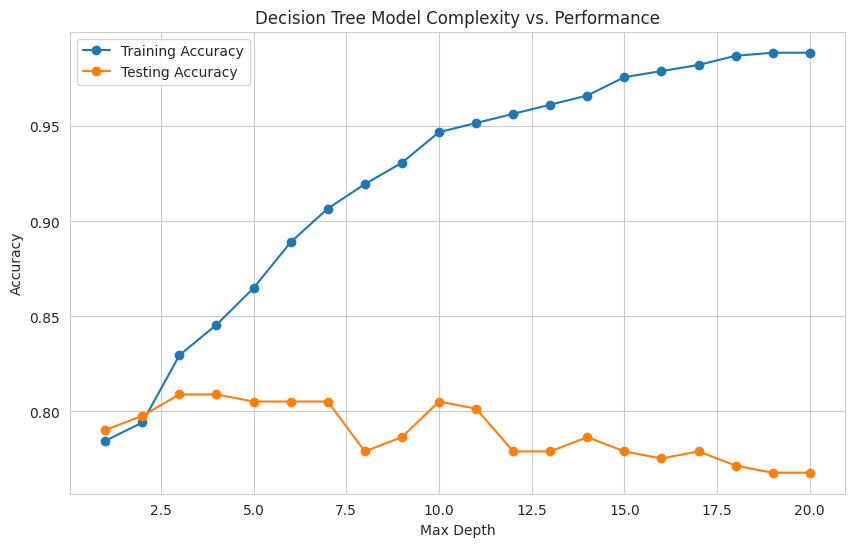

In [143]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42
)

# ------------------------------------------------------------------------
# LOOP OVER A HYPERPARAMETER (max_depth) TO CHECK OVERFITTING/UNDERFITTING
# ------------------------------------------------------------------------

max_depth_values = range(1, 21)  # vary the tree depth from 1 to 20
train_accuracies = []
test_accuracies = []

for depth in max_depth_values:
    # Create the model with the current max_depth
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the model
    dtree.fit(X_train, y_train)

    # Compute training accuracy
    train_acc = dtree.score(X_train, y_train)
    # Compute testing accuracy
    test_acc = dtree.score(X_test, y_test)

    # Store accuracies
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# ------------------------------------------------------------------------
# VISUALIZE TRAINING VS. TEST ACCURACY
# ------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(max_depth_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Decision Tree Model Complexity vs. Performance')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Underfitting (model too simple):
At very low depths (around 1 or 2), both training and test accuracy are relatively low (in the high 70%s). The tree isn’t complex enough to capture the data patterns, so it underfits.

Goldilocks zone (sweet spot):
As depth increases (around 3 or 4 in your plot), the testing accuracy peaks at about 0.80 (while training accuracy is ~0.85). That suggests the tree is capturing enough complexity without memorizing the training set.

Overfitting (model too complex):
Beyond max_depth ≈ 4, training accuracy continues to climb towards ~0.95 or higher, but the test accuracy actually declines or fluctuates below 0.80. This signals that the model is tailoring itself too closely to the training data and not generalizing as well—hence overfitting.

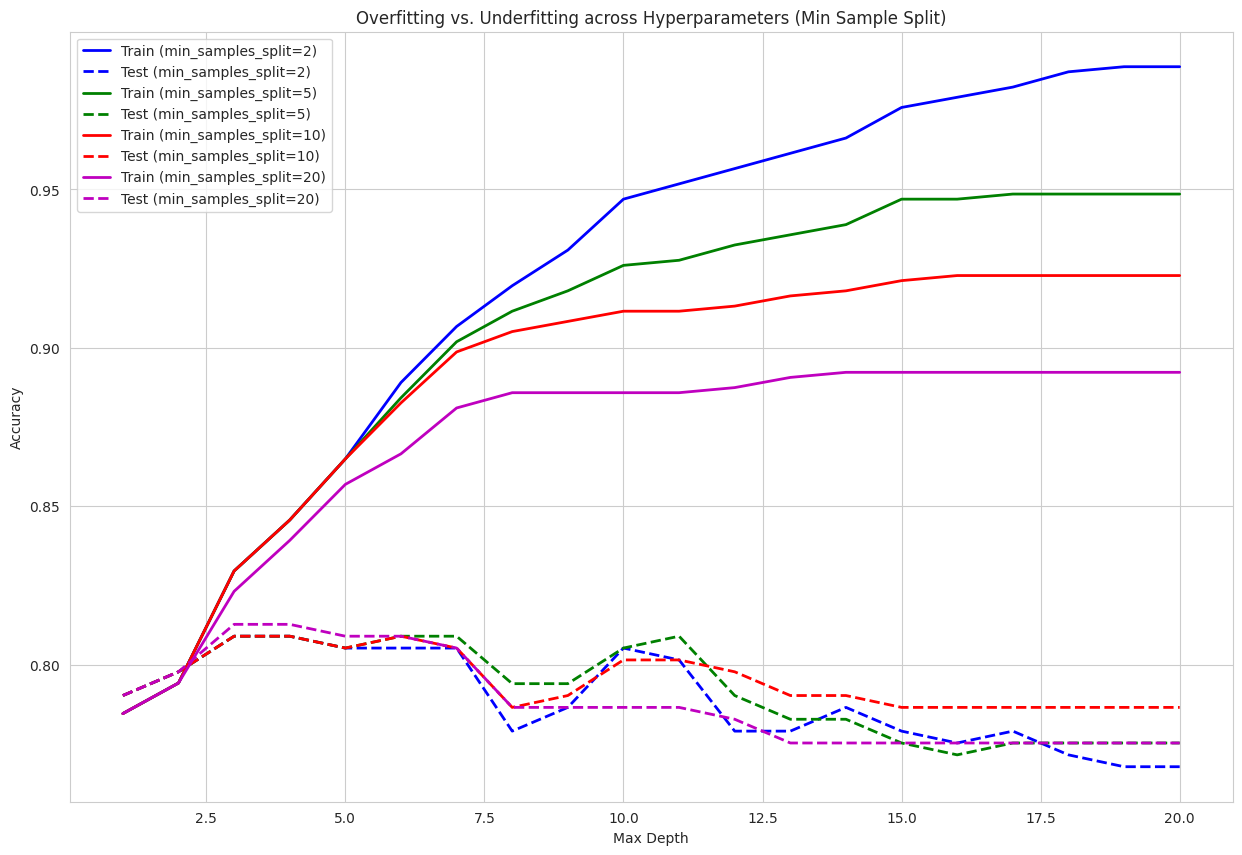

In [146]:
def plot_overfitting_vs_underfitting_with_colors(X_train, X_test, y_train, y_test):
    max_depth_values = range(1, 21)  # max_depth values
    min_samples_split_values = [2, 5, 10, 20]  # min_samples_split values to iterate over
    colors = ['b', 'g', 'r', 'm']  # Colors for consistent train-test pairings
    plt.figure(figsize=(15, 10))

    # Loop over different min_samples_split values
    for i, min_samples_split in enumerate(min_samples_split_values):
        train_accuracies = []
        test_accuracies = []

        for max_depth in max_depth_values:
            # Initialize DecisionTreeClassifier with varying hyperparameters
            dtree = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

            # Train the model
            dtree.fit(X_train, y_train)

            # Training and testing accuracies
            train_acc = dtree.score(X_train, y_train)
            test_acc = dtree.score(X_test, y_test)

            train_accuracies.append(train_acc)
            test_accuracies.append(test_acc)

        # Plot training and testing accuracies with color pairs
        plt.plot(max_depth_values, train_accuracies, color=colors[i], label=f"Train (min_samples_split={min_samples_split})", linewidth=2)
        plt.plot(max_depth_values, test_accuracies, color=colors[i], linestyle='dashed', label=f"Test (min_samples_split={min_samples_split})", linewidth=2)

    plt.title("Overfitting vs. Underfitting across Hyperparameters (Min Sample Split)")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the improved function for visualization
plot_overfitting_vs_underfitting_with_colors(X_train, X_test, y_train, y_test)


This plot shows training accuracy (solid lines) and testing accuracy (dashed lines) for a Decision Tree classifier as we vary the maximum depth (max_depth) of the tree for different values of min_samples_split.

- Underfitting (low complexity):

At low max depths (around 1-2), both training and testing accuracies are low, regardless of min_samples_split.
The model is too simple to capture patterns effectively, so it underfits.
- Goldilocks zone (balanced complexity):

For moderate max_depth values (~4–8), the testing accuracy reaches its peak while the training accuracy is close but not perfect.
This is where the model generalizes well without overfitting.
- Overfitting (high complexity):

At large max depths (10+), the training accuracy approaches 1.0 (100%) as the tree memorizes the training data.
However, the testing accuracy either remains constant or decreases slightly, especially for smaller min_samples_split values (e.g., min_samples_split=2), indicating overfitting.
- Effect of min_samples_split:

Low values (e.g., min_samples_split=2) allow the tree to grow very deep, leading to overfitting.
Higher values (e.g., min_samples_split=10 or 20) restrict the tree from making splits unless there are sufficient data points, helping prevent overfitting by creating simpler trees.

- The best-performing combinations appear around max_depth=6-8 with min_samples_split=5 or 10.
- Increasing min_samples_split tends to make the model more resistant to overfitting.
- The curves visually show how hyperparameter tuning influences model performance and demonstrates the trade-off between bias (underfitting) and variance (overfitting)

Comparing Decision Tree Hyperparameters:


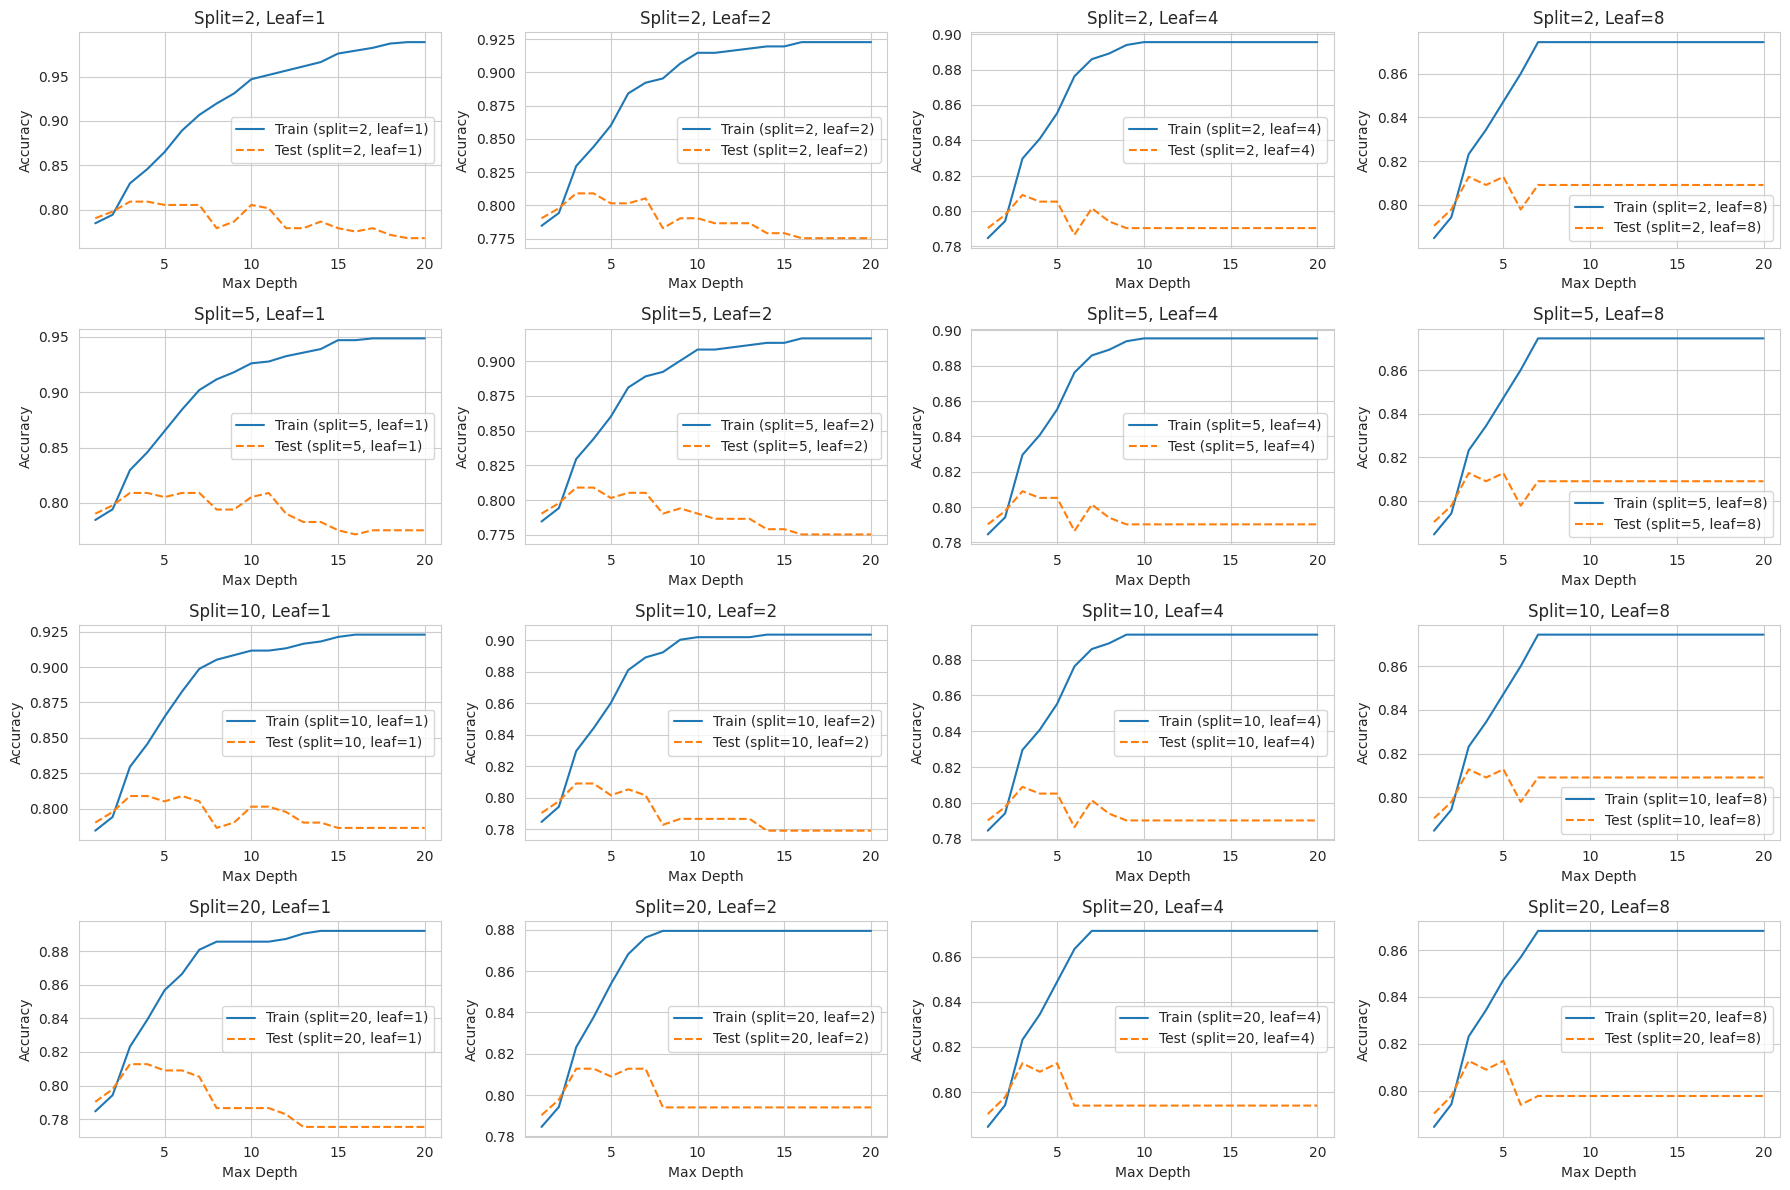


Comparing Logistic Regression Hyperparameters:


,C,Solver,Train F1 Score,Test F1 Score,Train Accuracy,Test Accuracy
0,0.01,lbfgs,0.721839,0.725275,0.805466,0.812734
5,0.01,liblinear,0.714588,0.716418,0.782958,0.786517
1,0.10,lbfgs,0.728070,0.713568,0.800643,0.786517
6,0.10,liblinear,0.734783,0.712871,0.803859,0.782772
2,1.00,lbfgs,0.732456,0.735294,0.803859,0.797753
7,1.00,liblinear,0.730853,0.735294,0.802251,0.797753
3,10.00,lbfgs,0.732456,0.735294,0.803859,0.797753
8,10.00,liblinear,0.732456,0.735294,0.803859,0.797753
4,100.00,lbfgs,0.732456,0.735294,0.803859,0.797753
9,100.00,liblinear,0.732456,0.735294,0.803859,0.797753


In [150]:
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from IPython.display import display


# Function to compare multiple hyperparameters for Decision Tree with visualization
def compare_decision_tree_hyperparams(X_train, X_test, y_train, y_test):
    # Hyperparameter ranges
    max_depth_values = range(1, 21)
    min_samples_split_values = [2, 5, 10, 20]
    min_samples_leaf_values = [1, 2, 4, 8]
    plt.figure(figsize=(18, 12))

    # Loop through combinations of hyperparameters
    for i, (min_samples_split, min_samples_leaf) in enumerate(itertools.product(min_samples_split_values, min_samples_leaf_values)):
        train_accuracies = []
        test_accuracies = []

        for max_depth in max_depth_values:
            # Initialize DecisionTreeClassifier
            dtree = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                                            min_samples_leaf=min_samples_leaf, random_state=42)

            # Train and predict
            dtree.fit(X_train, y_train)
            train_acc = dtree.score(X_train, y_train)
            test_acc = dtree.score(X_test, y_test)

            train_accuracies.append(train_acc)
            test_accuracies.append(test_acc)

        # Subplots for different combinations
        plt.subplot(4, 4, i + 1)
        plt.plot(max_depth_values, train_accuracies, label=f"Train (split={min_samples_split}, leaf={min_samples_leaf})")
        plt.plot(max_depth_values, test_accuracies, linestyle='dashed', label=f"Test (split={min_samples_split}, leaf={min_samples_leaf})")
        plt.title(f"Split={min_samples_split}, Leaf={min_samples_leaf}")
        plt.xlabel("Max Depth")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

from sklearn.preprocessing import StandardScaler

# Standardize the feature data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def compare_logistic_regression_hyperparams_final(X_train, X_test, y_train, y_test):
    C_values = [0.01, 0.1, 1, 10, 100]  # Regularization strength
    solvers = ['lbfgs', 'liblinear']  # Supported solvers for L2 regularization
    max_iters = [200, 500, 1000]  # Increased maximum iterations

    combinations = list(itertools.product(C_values, solvers, max_iters))
    total_plots = len(combinations)
    rows = int(np.ceil(total_plots / 3))  # Create a grid layout (3 columns)

    plt.figure(figsize=(15, 12))

    for i, (C, solver, max_iter) in enumerate(combinations):
        # Initialize LogisticRegression model with higher max_iter
        log_model = LogisticRegression(C=C, penalty='l2', solver=solver, max_iter=max_iter, random_state=42)

        # Train and evaluate
        log_model.fit(X_train, y_train)
        y_train_pred = log_model.predict(X_train)
        y_test_pred = log_model.predict(X_test)
        train_f1 = f1_score(y_train, y_train_pred)
        test_f1 = f1_score(y_test, y_test_pred)

        plt.subplot(rows, 3, i + 1)
        plt.bar(['Train F1', 'Test F1'], [train_f1, test_f1], color=['b', 'r'])
        plt.title(f"C={C}, Solver={solver}, MaxIter={max_iter}", fontsize=10)
        plt.ylim(0, 1)
        plt.grid(True)

    plt.suptitle("Logistic Regression Hyperparameter Comparison (with Scaling and Higher max_iter)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def line_plot_logistic_regression(X_train, X_test, y_train, y_test):
    C_values = [0.01, 0.1, 1, 10, 100]  # Regularization strengths
    solvers = ['lbfgs', 'liblinear']  # Solvers to compare
    max_iter = 500  # Set a common value for max iterations

    plt.figure(figsize=(10, 6))

    for solver in solvers:
        train_f1_scores = []
        test_f1_scores = []

        for C in C_values:
            # Initialize and fit Logistic Regression model
            log_model = LogisticRegression(C=C, penalty='l2', solver=solver, max_iter=max_iter, random_state=42)
            log_model.fit(X_train, y_train)

            # Calculate F1 scores for train and test sets
            y_train_pred = log_model.predict(X_train)
            y_test_pred = log_model.predict(X_test)
            train_f1 = f1_score(y_train, y_train_pred)
            test_f1 = f1_score(y_test, y_test_pred)

            train_f1_scores.append(train_f1)
            test_f1_scores.append(test_f1)

        # Plot train and test F1 scores for each solver
        plt.plot(C_values, train_f1_scores, marker='o', label=f"Train (solver={solver})")
        plt.plot(C_values, test_f1_scores, marker='o', linestyle='dashed', label=f"Test (solver={solver})")

    plt.xscale('log')  # Log scale for C values
    plt.xlabel('C (Inverse of Regularization Strength)')
    plt.ylabel('F1 Score')
    plt.title('Train vs. Test F1 Score for Logistic Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to create a results table for Logistic Regression hyperparameter comparison
def create_logistic_regression_results_table(X_train, X_test, y_train, y_test):
    C_values = [0.01, 0.1, 1, 10, 100]  # Regularization strengths
    solvers = ['lbfgs', 'liblinear']  # Solvers
    max_iter = 500  # Common max iteration value

    results = []

    for solver in solvers:
        for C in C_values:
            # Initialize Logistic Regression model
            log_model = LogisticRegression(C=C, penalty='l2', solver=solver, max_iter=max_iter, random_state=42)

            # Train and predict
            log_model.fit(X_train, y_train)
            y_train_pred = log_model.predict(X_train)
            y_test_pred = log_model.predict(X_test)

            # Calculate scores
            train_f1 = f1_score(y_train, y_train_pred)
            test_f1 = f1_score(y_test, y_test_pred)
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Add results to the table
            results.append({
                "C": C,
                "Solver": solver,
                "Train F1 Score": train_f1,
                "Test F1 Score": test_f1,
                "Train Accuracy": train_accuracy,
                "Test Accuracy": test_accuracy
            })

    # Create a DataFrame for better readability
    results_df = pd.DataFrame(results)
    results_df.sort_values(by="C", inplace=True)

    # Display the table
    display(results_df)


# Run comparisons
print("Comparing Decision Tree Hyperparameters:")
compare_decision_tree_hyperparams(X_train, X_test, y_train, y_test)

print("\nComparing Logistic Regression Hyperparameters:")
# compare_logistic_regression_hyperparams_final(X_train, X_test, y_train, y_test)
# line_plot_logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)
# Run the function to display a table of results
create_logistic_regression_results_table(X_train_scaled, X_test_scaled, y_train, y_test)



## How can we do better?

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

Compare Models:
In practice, after tuning each model, you would compare them on a consistent metric (accuracy, F1, AUC, etc.) to decide which is best for your Titanic prediction goals.

Overfitting vs. Underfitting:

Watch for large differences between training scores and validation/test scores; that indicates overfitting.
A model that underfits might produce similarly poor scores on train and test sets.
Interpretability:

Logistic Regression gives you coefficients that can be interpreted.
Decision Trees can be visualized.
Ensemble models usually perform better but are harder to interpret.
Feature Engineering:

Additional engineered features (e.g., extracting Title from Name, grouping ages, etc.) often improves performance.


## Great Job Everyone :-)